# Mugloest - 6 ADCP Experiment (March, 2013) 
&nbsp;<br>
## Residual currents
&nbsp;<br>



In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from pprint import pprint
import seawater as sea
import scipy.signal as signal

# Filter design
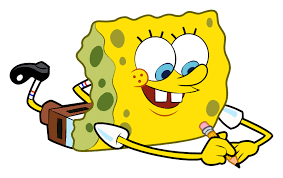

In [2]:
# removing high frequency oscillations
dt = 600    # 10 minutes in seconds
fs = 1/dt   # frequency of sampling
fc = 1/7200 # cut frequency 2 hours
fn = fs/2   # Nyquist frequency
fc_norm = fc / fn

b, a = signal.butter(N=4, Wn = fc_norm, btype = 'lowpass')

In [3]:
# removing tidal frequency oscillations
dt = 600    # 10 minutes in seconds
fs = 1/dt   # frequency of sampling
fc = 1/(16*3600) # cut frequency 13 hour
fn = fs/2   # Nyquist frequency
fc_norm = fc / fn

b2, a2 = signal.butter(N=4, Wn = fc_norm, btype = 'lowpass')

## Upload the reduced data (dictionary)

In [4]:
with open('Muglo_6ADCP_CT_dic.pkl', 'rb') as io:
    dic = pickle.load(io)

In [5]:
for c in dic:
    print(c)
print('')
for c in dic['neap']:
    print(c)
print('')
for c in dic['neap']['PF']:
    print(c)
print('')
for c in dic['neap']['PF']['surface']:
    print(c)

neap
spring

Praticagem
PF
Hospital
Rampa
Bombeiros
JoanaBezerra

time
pressure
temperature
time2d
z2d
currents2d
surface
bottom

temperature
salinity
density


## To extract the data from the dictionary to work with lists

In [6]:
# get the content of the dictionarly and create a list
def get_vars(campaign, station):
    time2d = dic[campaign][station]['time2d']
    z2d =    dic[campaign][station]['z2d']
    curr =   dic[campaign][station]['currents2d'] * -1  # Arnoldo´s convention flood (-), ebb (+)
    press =  dic[campaign][station]['pressure']
    time =   dic[campaign][station]['time']
    temp_s = dic[campaign][station]['surface']['temperature']
    sal_s =  dic[campaign][station]['surface']['salinity']
    temp_f = dic[campaign][station]['bottom']['temperature']
    sal_f =  dic[campaign][station]['bottom']['salinity']
    rho_s =  dic[campaign][station]['surface']['density']
    rho_f =  dic[campaign][station]['bottom']['density']

    bunch = [time2d, z2d, curr, time, press, temp_s, sal_s, temp_f, sal_f, rho_s, rho_f]
    return bunch

s1 = get_vars('spring', 'Praticagem')
n1 = get_vars('neap', 'Praticagem')

s2 = get_vars('spring', 'PF')
n2 = get_vars('neap', 'PF')

s3 = get_vars('spring', 'Bombeiros')
n3 = get_vars('neap', 'Bombeiros')

s4 = get_vars('spring', 'Hospital')
n4 = get_vars('neap', 'Hospital')

s5 = get_vars('spring', 'Rampa')
n5 = get_vars('neap', 'Rampa')

s6 = get_vars('spring', 'JoanaBezerra')
n6 = get_vars('neap', 'JoanaBezerra')

# coloca a ordem utilizada no artigo do Arnoldo 
# Praticagem, PF, Hospital, Rampa

N = [n1, n2, n4, n5]
S = [s1, s2, s4, s5]

CPS = [N, S] # campanhas

In [7]:
# bunch = [time2d, z2d, curr, press, time, temp_s, sal_s, temp_f, sal_f, rho_s, rho_f]

In [63]:
distances = np.array([2.5, 4, 7.3, 8.1])

In [64]:
N_rho_ta_s = []
N_rho_ta_b = []
S_rho_ta_s = []
S_rho_ta_b = []
for i in range(4):
    N_good = np.where(~np.isnan(N[i][9]))[0]
    S_good = np.where(~np.isnan(S[i][9]))[0]

    N_rho_ta_s.append(np.mean(N[i][9][N_good[0]:N_good[0]+250]))
    N_rho_ta_b.append(np.mean(N[i][10][N_good[0]:N_good[0]+250]))

    S_rho_ta_s.append(np.mean(S[i][9][S_good[0]:S_good[0]+250]))
    S_rho_ta_b.append(np.mean(S[i][10][S_good[0]:S_good[0]+250]))
    


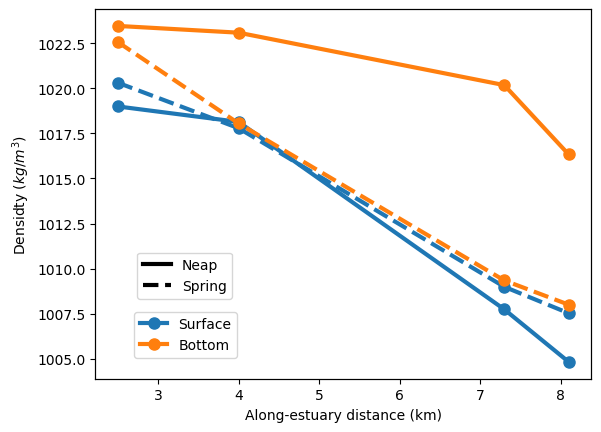

In [95]:
fig, ax = plt.subplots()

ax.plot(distances, N_rho_ta_s, 'o-', lw=3, ms=8, label='Surface')
ax.plot(distances, N_rho_ta_b, 'o-', lw=3, ms=8, label='Bottom')

ax.plot(distances, S_rho_ta_s, 'o--', color='tab:blue', lw=3, ms=8)
ax.plot(distances, S_rho_ta_b, 'o--', color='tab:orange', lw=3, ms=8)

ax.set_ylabel('Densidty $(kg/m^3)$')
ax.set_xlabel('Along-estuary distance (km)')

ax2 = ax.twinx()
ax2.plot(np.nan, np.nan, 'k-', label='Neap', markerfacecolor='k', lw=3, ms=8)
ax2.plot(np.nan, np.nan, 'k--', label='Spring',  markerfacecolor='k', lw=3, ms=8)
ax2.set_yticks([])
ax2.set_yticklabels('')

ax.legend(bbox_to_anchor=(.3,.2), bbox_transform=ax.transAxes)
ax2.legend(bbox_to_anchor=(.29,.36), bbox_transform=ax.transAxes)

## Smoothing the data 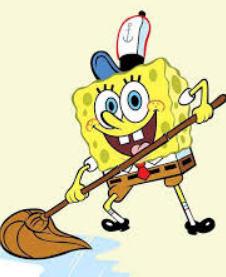

In [8]:
def filt_mtx(s):
    li, co = s.shape
    sf = np.full((li, co), np.nan)
    for l in range(li):
        i_good = np.where(~np.isnan(s[l,:]))[0]
        sf[l,i_good] = signal.filtfilt(b, a, s[l,i_good])
    return sf

In [9]:
def filt_mtx_bycol(s):
    li, co = s.shape
    sf = np.full((li, co), np.nan)
    for c in range(co):
        i_good = np.where(~np.isnan(s[:,c]))[0]
        sf[i_good,c] = signal.filtfilt(b, a, s[i_good,c])
    return sf

In [10]:
def filt_mtx2(s):
    li, co = s.shape
    sf = np.full((li, co), np.nan)
    for l in range(li):
        i_good = np.where(~np.isnan(s[l,:]))[0]
        sf[l,i_good] = signal.filtfilt(b2, a2, s[l,i_good])
    return sf

In [11]:
def filt_mtx_mm(s):  # média móvel
    li, co = s.shape
    sf = np.full((li, co), np.nan)
    for c in range(co):
        for l in range(36, li-36):
            sf[l, c] = np.mean(s[l-36:l+36,c])
    return sf

In [12]:
36*10/60

6.0

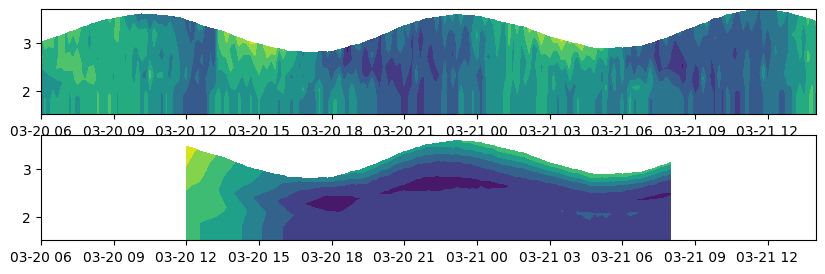

In [14]:
t = N[1][0]
z = N[1][1]
curr = N[1][2]

li, co = curr.shape
cf = np.full((li, co), np.nan)
for c in range(co):
    for l in range(36, li-36):
        cf[l, c] = np.mean(curr[l-36:l+36,c])


fig, axs = plt.subplots(2, figsize=(10,3))
axs[0].contourf(t.T, z.T, curr.T)
axs[1].contourf(t.T, z.T, cf.T)

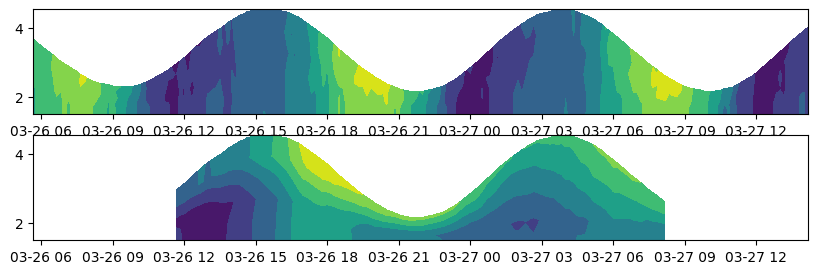

In [15]:
t = S[1][0]
z = S[1][1]
curr = S[1][2]

cf = filt_mtx_mm(curr)

fig, axs = plt.subplots(2, figsize=(10,3))
axs[0].contourf(t.T, z.T, curr.T)
axs[1].contourf(t.T, z.T, cf.T)

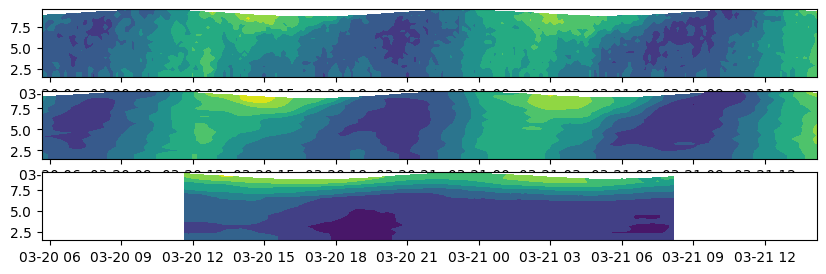

In [16]:
t = N[0][0]
z = N[0][1]
c = N[0][2]

cf = filt_mtx_mm(c)

fig, axs = plt.subplots(3, figsize=(10,3))
axs[0].contourf(t.T, z.T, c.T)
axs[1].contourf(t.T, z.T, filt_mtx_bycol(c).T)
axs[2].contourf(t.T, z.T, cf.T)

# Figura 2 artigo Arnoldo

In [17]:
# chatgpt - criando uma zona branca no zero do bwr

c_levels = 50

cmap = plt.get_cmap('bwr', c_levels)
colors = cmap(np.linspace(0, 1, c_levels))

f = 0.1
mid = int(c_levels*f)

center = c_levels // 2
colors[center-mid:center+mid] = [1,1,1,1]

new_cmap = mcolors.ListedColormap(colors, name='bwr2')

Text(0.02, 0.19, '#4')

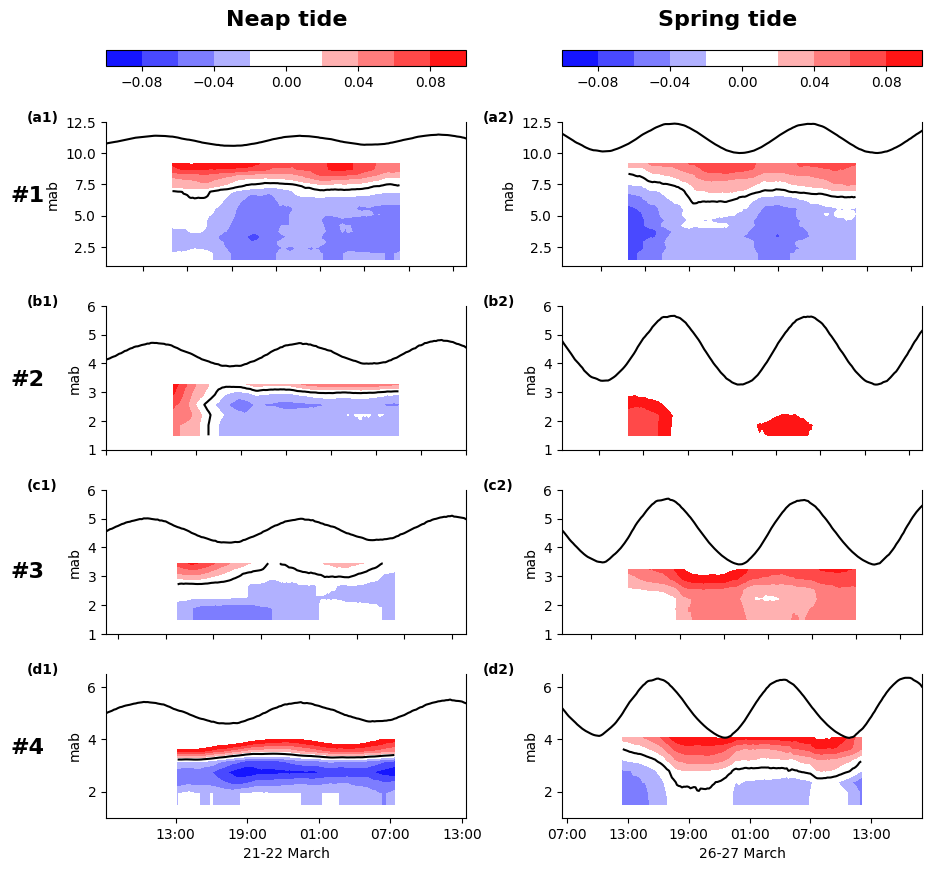

In [49]:
fig = plt.figure(figsize=(12,8))

px = .1
py = .8
dx = .3
dy = .18
dy2 = .09
cb_dx = .01
int_v = .05
int_h = -0.02

axc1 = []
axc2 = []
axc1cb = []
axc2cb = []

ylims = [(1, 12.5), (1,6), (1, 6), (1, 6.5)]
letters1 = ['(a1)', '(b1)', '(c1)', '(d1)']
letters2 = ['(a2)', '(b2)', '(c2)', '(d2)']

for i in range(4):
    axc1.append(fig.add_axes([px, py-(dy+int_v)*i, dx, dy]))
    axc2.append(fig.add_axes([px*2+dx+int_h, py-(dy+int_v)*i, dx, dy]))

   
    # column left (Neap)

    Nz = np.mean(N[i][1], axis=0)
    M_Nz = np.array([Nz for _ in range(len(N[i][1]))])
    Sz = np.mean(S[i][1], axis=0)
    M_Sz = np.array([Sz for _ in range(len(S[i][1]))])
    
    norm = mcolors.TwoSlopeNorm(vmin = -0.1, vcenter=0, vmax = 0.1)
    levels = np.linspace(-.1, .1, 11)
    cb1 = axc1[i].contourf(N[i][0].T, M_Nz.T, filt_mtx_mm(N[i][2]).T, cmap=new_cmap, norm=norm, levels=levels)
    axc1[i].contour(N[i][0].T, M_Nz.T, filt_mtx_mm(N[i][2]).T, [0], colors='k')
    axc1[i].plot(N[i][3], N[i][4], 'k')
    axc1[i].text(-0.22, 1, letters1[i], transform=axc1[i].transAxes, fontweight='bold')
    #plt.colorbar(cb1, cax=axc1cb[i])

    # column right
    norm = mcolors.TwoSlopeNorm(vmin = -0.1, vcenter=0, vmax = 0.1)
    cb2 = axc2[i].contourf(S[i][0].T, M_Sz.T, filt_mtx_mm(S[i][2]).T, cmap=new_cmap, norm=norm, levels=levels)
    axc2[i].contour(S[i][0].T, M_Sz.T, filt_mtx_mm(S[i][2]).T, [0], colors='k')
    axc2[i].plot(S[i][3], S[i][4], 'k')
    #plt.colorbar(cb2, cax=axc2cb[i])
    axc2[i].text(-0.22, 1, letters2[i], transform=axc2[i].transAxes, fontweight='bold')

    axc = [axc1[i], axc2[i]]
    for j, ax in enumerate(axc):
        ax.spines['top'].set_visible(False)
        ax.set_ylim(ylims[i])
        ax.set_ylabel('mab')
        ax.xaxis.set_major_locator(mdates.HourLocator(interval=4))
        if i < 3:
            ax.set_xticklabels('')
        if i == 3:
            ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
            if j == 0:    
                ax.set_xlabel('21-22 March')
            else:
                ax.set_xlabel('26-27 March')

cbar_ax1 = fig.add_axes([px, 1.05, dx, .02])
cbar_ax2 = fig.add_axes([px*2+dx+int_h, 1.05, dx, .02])

cbar1 = fig.colorbar(cb1, cax=cbar_ax1, orientation='horizontal')
cb1.set_clim(-0.1, .1)

cbar2 = fig.colorbar(cb2, cax=cbar_ax2, orientation='horizontal')
cb2.set_clim(-0.1, .1)

fig.text(.2, 1.1, 'Neap tide', fontsize=16, fontweight='bold')
fig.text(.56, 1.1, 'Spring tide', fontsize=16, fontweight='bold')
fig.text(0.02, .88, '#1', fontsize=16, fontweight='bold')
fig.text(0.02, .65, '#2', fontsize=16, fontweight='bold')
fig.text(0.02, .41, '#3', fontsize=16, fontweight='bold')
fig.text(0.02, .19, '#4', fontsize=16, fontweight='bold')